In [1]:
import requests
import os
import urllib.request
import pandas as pd
import seaborn as sns

In [2]:
#Install 
!pip install umap-learn magic-impute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.3 MB/s 
     |████████████████████████████████| 1.1 MB 39.0 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 93 kB 2.4 MB/s 
     |████████████████████████████████| 1.8 MB 44.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=38ad9fde96ab1f6a1dda72bf1a4bb1fc6d15b9a6b3fe85fb07892f1498f7701f
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=a134610547d8f328104bdd47c3e59d090e62809c336ce729e32c56a89a1403fa
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [3]:
import umap

In [4]:
url_proka = 'https://raw.githubusercontent.com/resendislab/mb-PHENIX/main/CODE/covid%20sample%20and%20T2D%20example%20dataset/proka_matrix_v1.txt'

In [5]:
urllib.request.urlretrieve(url_proka, 'proka_matrix_v1.txt')
os.listdir()
#!cd /content

['.config', 'proka_matrix_v1.txt', 'sample_data']

In [6]:

url_proka_tag = 'https://raw.githubusercontent.com/resendislab/mb-PHENIX/main/CODE/covid%20sample%20and%20T2D%20example%20dataset/mod_tabla_sample.txt'


In [7]:
urllib.request.urlretrieve(url_proka_tag, 'mod_tabla_sample.txt')
os.listdir()
!cd /content

In [8]:
complement_asvstable = pd.read_csv('/content/proka_matrix_v1.txt', delimiter = "\t",header=0).set_index('taxa').T

In [9]:
complement_asvstable

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Vagococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia
sample_30099,0,0,0,0,0,0,3,0,0,0,...,0,0,73,0,0,0,0,114,0,0
sample_30104,0,0,0,0,0,0,0,0,0,0,...,0,0,110,0,0,0,0,77,0,0
sample_30114,0,0,0,0,0,0,0,0,0,0,...,0,0,13,0,0,0,0,363,0,0
sample_30170,0,0,0,0,0,0,0,0,0,0,...,0,0,355,0,0,0,0,0,0,0
sample_30189,0,0,0,0,0,0,0,0,0,0,...,0,0,90,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,0,0,0,0,0,157,0,0,0,0,...,0,0,367,0,0,0,0,715,0,0
sample_75024,0,0,0,0,0,0,0,0,0,0,...,0,0,1854,0,0,0,0,11,0,0
sample_75029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_75041,0,0,0,0,0,0,0,0,0,0,...,0,0,83,0,0,0,0,0,0,0


In [10]:
sample_data = pd.read_csv('/content/mod_tabla_sample.txt', delimiter = "\t")
sample_data = sample_data.set_index('sample_id')
sample_data = sample_data['status']
sample_data = pd.DataFrame(sample_data)
sample_data_1 =  pd.DataFrame(sample_data)
sample_data

,status
sample_id,
sample_30099,healthy
sample_30104,healthy
sample_30114,IFG
sample_30170,IFG+IGT
sample_30189,T2D
...,...
sample_75015,IGT
sample_75024,IFG+IGT
sample_75029,healthy


In [11]:
sample_data = pd.read_csv('/content/mod_tabla_sample.txt', delimiter = "\t")
sample_data = sample_data.set_index('sample_id')
sample_data = sample_data['status']
sample_data = pd.DataFrame(sample_data)
sample_data_1 =  pd.DataFrame(sample_data)
sample_data

,status
sample_id,
sample_30099,healthy
sample_30104,healthy
sample_30114,IFG
sample_30170,IFG+IGT
sample_30189,T2D
...,...
sample_75015,IGT
sample_75024,IFG+IGT
sample_75029,healthy


In [12]:
sample_data= pd.Series(data=sample_data['status'])

In [13]:
clasesdic={"healthy":0,"IFG":1,"IGT":2,"IFG+IGT":3,"T2D":4,"T2D_treated":5}
sample_data_4umap= sample_data.map(clasesdic)

In [14]:
sample_data_4umap

sample_id
sample_30099    0
sample_30104    0
sample_30114    1
sample_30170    3
sample_30189    4
               ..
sample_75015    2
sample_75024    3
sample_75029    0
sample_75041    1
sample_75049    0
Name: status, Length: 430, dtype: int64

#**Microbiome data**

In [15]:
url_mbphenix = 'https://raw.githubusercontent.com/resendislab/mb-PHENIX/main/CODE/mb-phenix%20code/mb_PHENIX.py'

In [16]:
urllib.request.urlretrieve(url_mbphenix, 'mb_PHENIX.py')
os.listdir()
!cd /content

#**Import mb-PHENIX**

In [17]:
from mb_PHENIX import mbPHENIX

#**imputation mb-PHENIX in a surpervised manner**
this is just like sc-phenix https://doi.org/10.1101/2022.06.09.495525

In [18]:


umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=500,min_dist=0.1,
                    n_neighbors=200,random_state=1,target_weight=0.9)
data_umap_vis_super = umap_op.fit_transform(complement_asvstable,sample_data_4umap)

UMAP(angular_rp_forest=True, metric='cosine', n_components=10, n_epochs=500, n_neighbors=200, random_state=1, target_weight=0.9, verbose=True)
Wed Nov 16 03:25:59 2022 Construct fuzzy simplicial set
Wed Nov 16 03:26:00 2022 Finding Nearest Neighbors
Wed Nov 16 03:26:03 2022 Finished Nearest Neighbor Search
Wed Nov 16 03:26:09 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Nov 16 03:26:16 2022 Finished embedding


In [19]:
imputed_ALL =mbPHENIX(complement_asvstable, data_umap_vis_super, 
                      t=3,decay=1,metric='euclidean',knn=10)

calculando distancias
(430, 430)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed Nov 16 03:26:17 2022


In [20]:
imputed_ALL

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Vagococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia
sample_30099,3.358178,4.251201e-01,3.579884e-01,4.026016e-02,9.266411e-10,27.752635,2.419050e-02,4.580377e-02,1.364379e-10,1.542833,...,6.034622e+00,9.704400e-01,923.820721,6.342060e-02,1.341935e-02,0.443022,2.370293e-01,211.890950,3.232764e-10,1.479814e-01
sample_30104,3.343556,4.495697e-01,3.597032e-01,3.464721e-02,9.599465e-10,28.207091,2.445809e-02,4.627448e-02,1.413172e-10,1.546306,...,6.046180e+00,1.063874e+00,870.448948,6.407236e-02,1.485166e-02,0.462051,2.352276e-01,197.493964,3.344815e-10,1.495022e-01
sample_30114,2.612491,1.624356e-08,9.648670e-10,9.919811e-11,9.670256e-01,104.100591,4.308190e-11,1.454846e-10,3.384589e-01,0.863295,...,1.571567e-01,9.262684e-09,900.595774,2.014402e-10,4.254060e-11,2.400241,8.773600e-02,75.648573,6.106326e-10,4.700271e-10
sample_30170,0.683211,1.374055e+00,1.019126e-08,1.049359e-09,5.876992e-09,88.275112,4.556171e-10,1.535935e-09,2.040786e-09,2.012087,...,3.273837e-01,3.436380e-08,939.753973,2.126679e-09,4.498050e-10,0.450987,1.153941e-08,95.305206,3.957207e-02,4.962252e-09
sample_30189,4.425642,9.229031e-09,3.699415e-09,3.836180e-10,3.550864e-01,8.314006,1.665293e-10,5.577006e-10,4.346630e-08,0.828142,...,2.657039e-01,3.948157e-08,1725.670590,7.722008e-10,1.643560e-10,0.427934,2.505350e+00,129.017205,5.207096e-12,1.801802e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,0.749388,3.796965e-01,1.488525e-08,1.542705e-09,2.190612e-09,13.396154,6.698081e-10,2.244835e-09,2.165971e-10,0.243008,...,2.314902e-07,6.837060e-08,2041.110256,3.108233e-09,6.615491e-10,0.704450,5.446765e+00,192.452677,8.517412e-11,7.252545e-09
sample_75024,1.066173,7.839754e-01,1.066329e-08,1.097118e-09,4.503460e-09,172.494883,4.763607e-10,1.606992e-09,1.567093e-09,1.689875,...,5.458597e-01,3.595051e-08,1039.615770,2.225066e-09,4.702840e-10,0.295648,1.047732e-08,70.055567,1.009351e-01,5.191820e-09
sample_75029,3.385835,4.163528e-01,3.537845e-01,4.181416e-02,8.803152e-10,27.266972,2.458364e-02,4.410996e-02,1.296523e-10,1.555524,...,6.173536e+00,9.246931e-01,929.047654,6.107533e-02,1.313062e-02,0.421649,2.380899e-01,216.612299,3.076183e-10,1.425091e-01
sample_75041,2.411754,7.818985e-09,7.916078e-10,8.172887e-11,1.583968e+00,60.575635,3.548675e-11,1.193493e-10,5.543887e-0

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


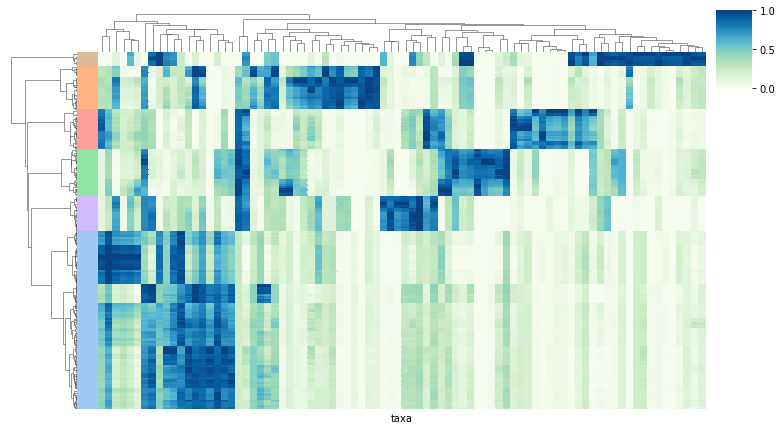

In [21]:
import scprep
import seaborn as sns
imp_all = scprep.select.highly_variable_genes(imputed_ALL,percentile=80)
# heatmap labels
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

#**imputation mb-PHENIX in a UNsurpervised manner** just like sc-phenix

In [22]:
umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=500,min_dist=0.5,n_neighbors=200,random_state=1,)
data_umap_vis_unsuper = umap_op.fit_transform(complement_asvstable)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.5, n_components=10, n_epochs=500, n_neighbors=200, random_state=1, verbose=True)
Wed Nov 16 03:26:18 2022 Construct fuzzy simplicial set
Wed Nov 16 03:26:19 2022 Finding Nearest Neighbors
Wed Nov 16 03:26:19 2022 Finished Nearest Neighbor Search
Wed Nov 16 03:26:19 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Nov 16 03:26:33 2022 Finished embedding


In [23]:
imputed_ALL_unsuper =mbPHENIX(complement_asvstable, data_umap_vis_unsuper, t=5,decay=1,metric='euclidean',knn=10)

calculando distancias
(430, 430)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed Nov 16 03:26:33 2022


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


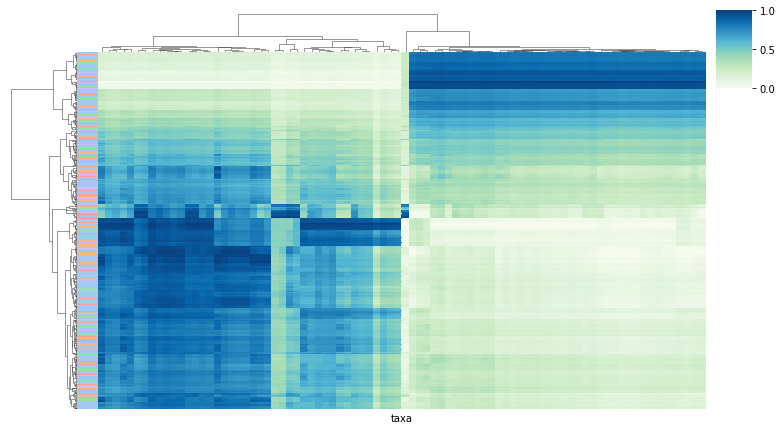

In [24]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

#*Non-imputed data distribution by status clusters*





In [25]:
complement_asvstable

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Vagococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia
sample_30099,0,0,0,0,0,0,3,0,0,0,...,0,0,73,0,0,0,0,114,0,0
sample_30104,0,0,0,0,0,0,0,0,0,0,...,0,0,110,0,0,0,0,77,0,0
sample_30114,0,0,0,0,0,0,0,0,0,0,...,0,0,13,0,0,0,0,363,0,0
sample_30170,0,0,0,0,0,0,0,0,0,0,...,0,0,355,0,0,0,0,0,0,0
sample_30189,0,0,0,0,0,0,0,0,0,0,...,0,0,90,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,0,0,0,0,0,157,0,0,0,0,...,0,0,367,0,0,0,0,715,0,0
sample_75024,0,0,0,0,0,0,0,0,0,0,...,0,0,1854,0,0,0,0,11,0,0
sample_75029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_75041,0,0,0,0,0,0,0,0,0,0,...,0,0,83,0,0,0,0,0,0,0


In [26]:
dataframe_noimp =  complement_asvstable.copy()


In [27]:
dataframe_noimp

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Vagococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia
sample_30099,0,0,0,0,0,0,3,0,0,0,...,0,0,73,0,0,0,0,114,0,0
sample_30104,0,0,0,0,0,0,0,0,0,0,...,0,0,110,0,0,0,0,77,0,0
sample_30114,0,0,0,0,0,0,0,0,0,0,...,0,0,13,0,0,0,0,363,0,0
sample_30170,0,0,0,0,0,0,0,0,0,0,...,0,0,355,0,0,0,0,0,0,0
sample_30189,0,0,0,0,0,0,0,0,0,0,...,0,0,90,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,0,0,0,0,0,157,0,0,0,0,...,0,0,367,0,0,0,0,715,0,0
sample_75024,0,0,0,0,0,0,0,0,0,0,...,0,0,1854,0,0,0,0,11,0,0
sample_75029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_75041,0,0,0,0,0,0,0,0,0,0,...,0,0,83,0,0,0,0,0,0,0


In [28]:
dataframe_noimp.to_csv('TD2.csv')

In [29]:
name_1 = 'Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Akkermansia'

In [30]:
sample_data_1

,status
sample_id,
sample_30099,healthy
sample_30104,healthy
sample_30114,IFG
sample_30170,IFG+IGT
sample_30189,T2D
...,...
sample_75015,IGT
sample_75024,IFG+IGT
sample_75029,healthy


In [31]:
dataframe_noimp['status']= sample_data_1['status']

In [32]:
dataframe_noimp.columns[50]

'Bacteria;Proteobacteria;Deltaproteobacteria;Bdellovibrionales;Bdellovibrionaceae;Bdellovibrio'

In [33]:
dataframe_noimp

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia,status
sample_30099,0,0,0,0,0,0,3,0,0,0,...,0,73,0,0,0,0,114,0,0,healthy
sample_30104,0,0,0,0,0,0,0,0,0,0,...,0,110,0,0,0,0,77,0,0,healthy
sample_30114,0,0,0,0,0,0,0,0,0,0,...,0,13,0,0,0,0,363,0,0,IFG
sample_30170,0,0,0,0,0,0,0,0,0,0,...,0,355,0,0,0,0,0,0,0,IFG+IGT
sample_30189,0,0,0,0,0,0,0,0,0,0,...,0,90,0,0,0,0,0,0,0,T2D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,0,0,0,0,0,157,0,0,0,0,...,0,367,0,0,0,0,715,0,0,IGT
sample_75024,0,0,0,0,0,0,0,0,0,0,...,0,1854,0,0,0,0,11,0,0,IFG+IGT
sample_75029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,healthy
sample_75041,0,0,0,0,0,0,0,0,0,0,...,0,83,0,0,0,0,0,0,0,IFG


In [34]:
#name_1="Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes"

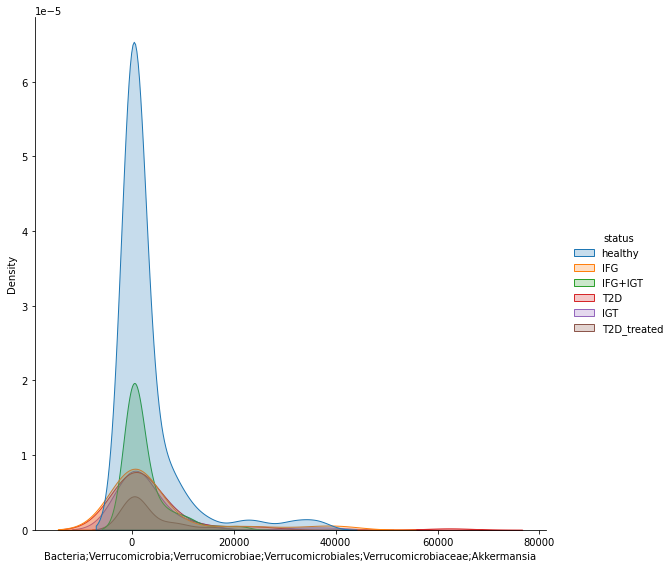

In [35]:
sns.displot(dataframe_noimp, x=name_1, hue="status", kind="kde", fill=True,height=8, aspect=1)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


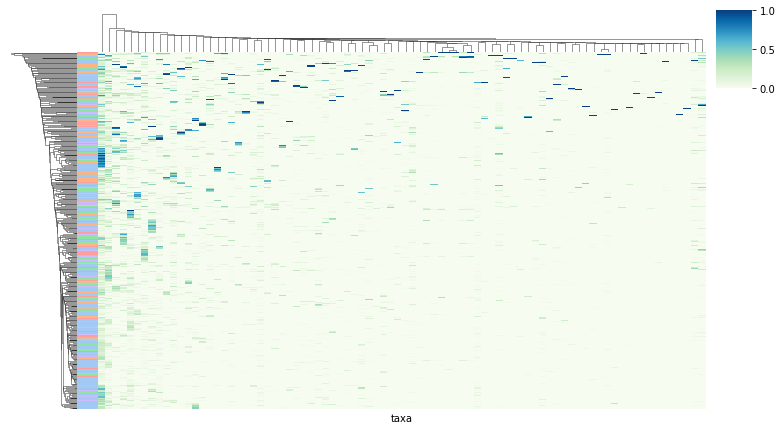

In [36]:
imp_all = scprep.select.highly_variable_genes(complement_asvstable,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

#*Unsupervised imputed data distribution by status clusters (UMAP non supervised) for mb-phenix* 

In [37]:
imputed_ALL_unsuper

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Vagococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia
sample_30099,2.457040,0.488465,0.222263,0.017177,0.147854,49.884651,0.007881,0.034288,0.042536,1.020865,...,2.567110,0.893572,1080.291142,0.047475,0.011669,0.807936,1.089479,150.900770,0.007679,0.110775
sample_30104,2.459752,0.492950,0.222836,0.017057,0.149391,49.777201,0.007877,0.034112,0.043259,1.021962,...,2.604652,0.895479,1074.835153,0.047232,0.011776,0.810479,1.085972,150.725309,0.007651,0.110208
sample_30114,2.460222,0.495738,0.224771,0.016381,0.144904,51.166676,0.007529,0.034624,0.041888,1.015590,...,2.551006,0.922958,1077.814414,0.047942,0.012001,0.827329,1.045077,147.071165,0.008173,0.111864
sample_30170,2.415908,0.494059,0.223552,0.017298,0.155023,48.489130,0.007782,0.033809,0.044501,1.023847,...,2.681612,0.864264,1079.402230,0.046813,0.011693,0.803378,1.080026,152.066470,0.007189,0.109229
sample_30189,2.419929,0.493351,0.223506,0.017295,0.154330,48.619641,0.007798,0.033888,0.044322,1.023260,...,2.671050,0.867061,1079.582589,0.046922,0.011683,0.803813,1.080737,151.974367,0.007240,0.109485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,2.433364,0.484825,0.222747,0.016870,0.145050,50.609688,0.007527,0.034644,0.040944,1.014117,...,2.503003,0.898724,1093.829637,0.047969,0.011660,0.814970,1.056196,148.650962,0.007933,0.111927
sample_75024,2.544394,0.477658,0.225072,0.014501,0.121653,58.533560,0.006792,0.037070,0.034951,0.992388,...,2.206442,1.067155,1099.686253,0.051328,0.012268,0.892242,0.944599,135.198544,0.011012,0.119765
sample_75029,2.451290,0.490752,0.221301,0.017711,0.153401,48.302891,0.008164,0.033646,0.044331,1.026044,...,2.648097,0.864814,1073.780351,0.046586,0.011562,0.793013,1.121367,154.167456,0.007090,0.108701
sample_75041,2.420921,0.495531,0.223419,0.017406,0.156643,48.168263,0.007888,0.033653,0.045223,1.026523,...,2.713656,0.860676,1075.086597,0.046597,0.011690,0.801020,1.089873,152.860632,0.007080,0.108726


In [38]:
dataframe_imp_super=  imputed_ALL_unsuper.copy()

In [39]:
dataframe_imp_super['status']= sample_data_1['status']

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


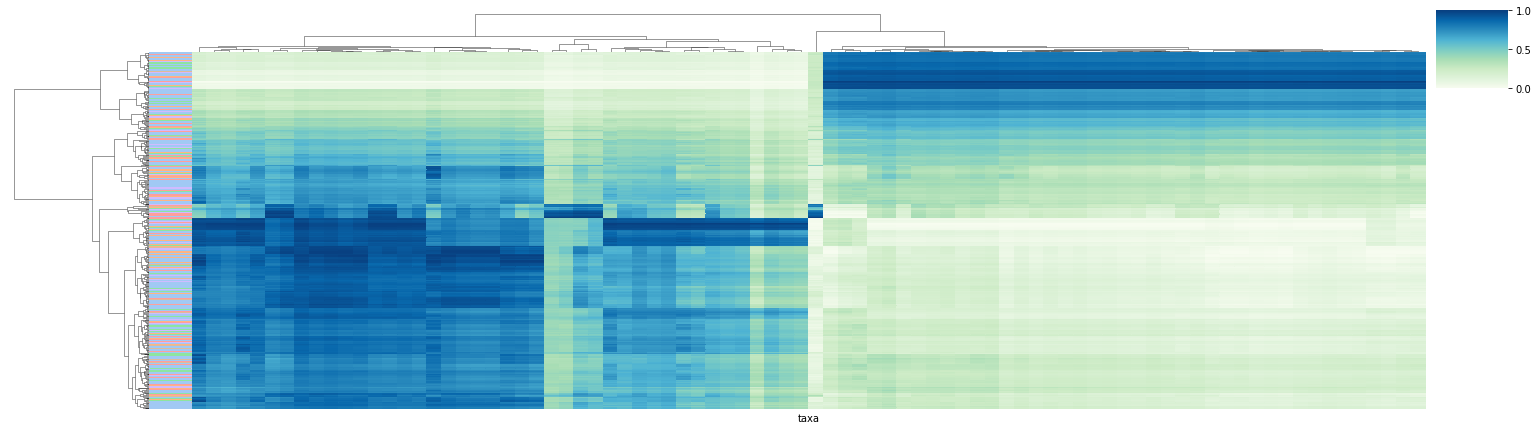

In [40]:
import scprep
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

imp_dataframe_imp_super = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)
ax = sns.clustermap(imp_dataframe_imp_super.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(20, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

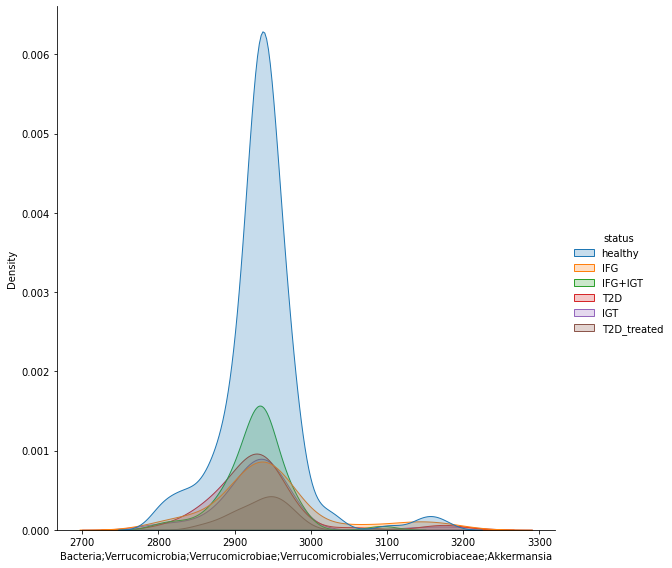

In [41]:
b= sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=False,height=8, aspect=1)
#b.set(xlim=(0.005, 37))

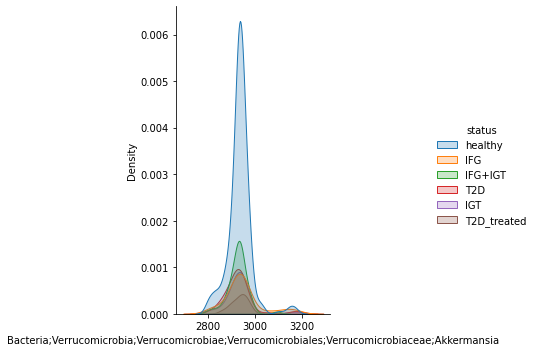

In [42]:
b= sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=False)
#b.set(xlim=())

MAGIC

In [43]:
import magic
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(complement_asvstable)

Calculating MAGIC...
  Running MAGIC on 430 cells and 417 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.07 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.18 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.22 seconds.


In [44]:
dataframe_imp_MAGIC=  X_magic.copy()
dataframe_imp_MAGIC['status']= sample_data_1['status']

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


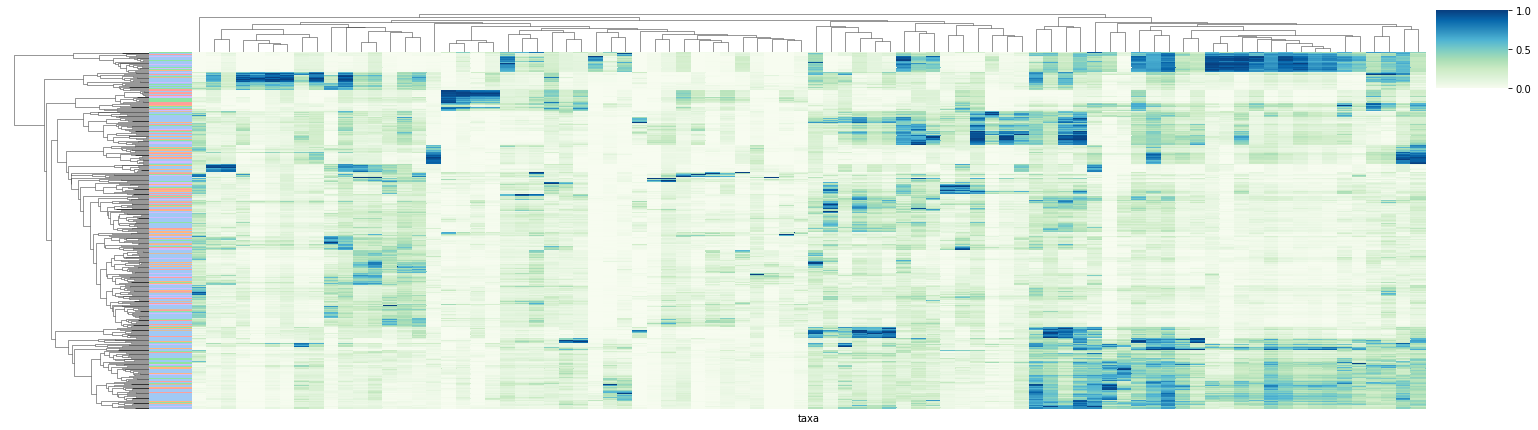

In [45]:
import scprep
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

imp_all = scprep.select.highly_variable_genes(X_magic,percentile=80)
ax = sns.clustermap(imp_all.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(20, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [46]:
X_magic

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Vagococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia
sample_30099,6.861813,0.051186,0.021095,0.050728,0.014133,25.658038,0.108811,0.000653,0.004947,0.436905,...,1.200652,1.027081,338.633008,0.000904,0.006694,0.121490,1.206399,218.852445,0.006377,0.002110
sample_30104,3.673029,0.317404,0.011281,0.026157,0.071453,13.938212,0.006539,0.000049,0.025009,0.963308,...,4.851113,0.616783,357.587302,0.000069,0.003170,0.420784,2.184932,137.141926,0.000232,0.000160
sample_30114,2.368423,0.963920,0.031591,0.000340,0.011402,13.312659,0.000000,0.000970,0.003844,0.698194,...,1.720322,0.680622,460.771731,0.001342,0.005345,1.252140,0.185070,145.473414,0.001468,0.003132
sample_30170,0.812050,1.342841,0.297945,0.008145,1.395703,10.899054,0.000529,0.000000,0.487071,1.380387,...,8.932241,0.053824,254.299560,0.000000,0.000794,1.132417,0.180925,71.609556,0.000296,0.000000
sample_30189,0.900834,1.301927,0.975929,0.004270,2.097187,11.482828,0.000870,0.002992,0.733707,0.756927,...,4.124485,0.216950,324.074153,0.004142,0.002019,1.371570,0.178141,50.817058,0.002328,0.009665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,1.263894,0.167314,0.027155,0.111781,0.014580,25.313080,0.003750,0.001257,0.000264,0.866285,...,2.808500,0.251125,1145.589754,0.001740,0.001562,0.277079,1.021849,222.834783,0.002388,0.004061
sample_75024,1.081762,0.382579,0.203251,0.000000,0.002724,65.565334,0.000446,0.020788,0.000828,0.739681,...,0.472035,5.588385,623.726756,0.028784,0.036544,2.203993,0.050612,69.734779,0.076705,0.067162
sample_75029,3.645754,0.051470,0.008771,0.094511,0.029269,14.563742,0.051712,0.000000,0.010244,0.654260,...,3.284347,0.768561,342.407956,0.000000,0.001366,0.299281,3.352596,327.634191,0.000054,0.000000
sample_75041,1.438818,1.595795,0.341746,0.006273,1.869117,4.758038,0.001297,0.000000,0.654123,1.229971,...,7.865596,0.098430,228.499143,0.000000,0.001534,1.498195,0.412098,64.689187,0.000087,0.000000


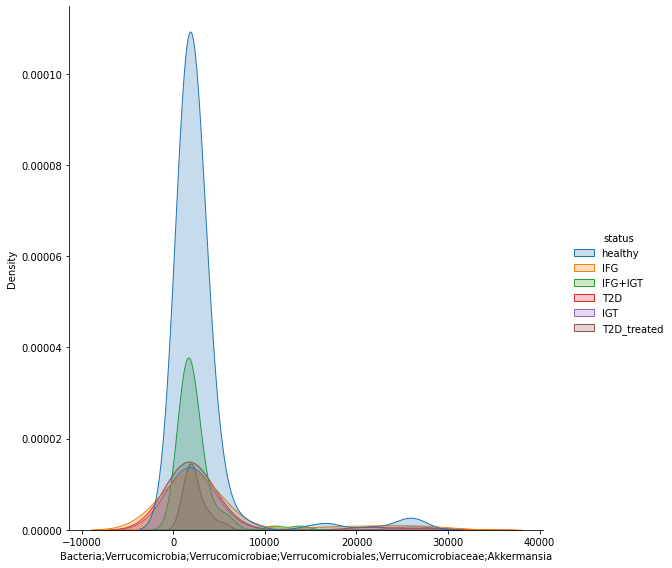

In [47]:
name_1= "Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Akkermansia"
b= sns.displot(dataframe_imp_MAGIC, x=name_1, hue="status", kind="kde", fill=True,log_scale=False,height=8, aspect=1)
#b.set(xlim=())

#*Superviced imputed data distribution by status clusters*

In [48]:
imputed_ALL

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Vagococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia
sample_30099,3.358178,4.251201e-01,3.579884e-01,4.026016e-02,9.266411e-10,27.752635,2.419050e-02,4.580377e-02,1.364379e-10,1.542833,...,6.034622e+00,9.704400e-01,923.820721,6.342060e-02,1.341935e-02,0.443022,2.370293e-01,211.890950,3.232764e-10,1.479814e-01
sample_30104,3.343556,4.495697e-01,3.597032e-01,3.464721e-02,9.599465e-10,28.207091,2.445809e-02,4.627448e-02,1.413172e-10,1.546306,...,6.046180e+00,1.063874e+00,870.448948,6.407236e-02,1.485166e-02,0.462051,2.352276e-01,197.493964,3.344815e-10,1.495022e-01
sample_30114,2.612491,1.624356e-08,9.648670e-10,9.919811e-11,9.670256e-01,104.100591,4.308190e-11,1.454846e-10,3.384589e-01,0.863295,...,1.571567e-01,9.262684e-09,900.595774,2.014402e-10,4.254060e-11,2.400241,8.773600e-02,75.648573,6.106326e-10,4.700271e-10
sample_30170,0.683211,1.374055e+00,1.019126e-08,1.049359e-09,5.876992e-09,88.275112,4.556171e-10,1.535935e-09,2.040786e-09,2.012087,...,3.273837e-01,3.436380e-08,939.753973,2.126679e-09,4.498050e-10,0.450987,1.153941e-08,95.305206,3.957207e-02,4.962252e-09
sample_30189,4.425642,9.229031e-09,3.699415e-09,3.836180e-10,3.550864e-01,8.314006,1.665293e-10,5.577006e-10,4.346630e-08,0.828142,...,2.657039e-01,3.948157e-08,1725.670590,7.722008e-10,1.643560e-10,0.427934,2.505350e+00,129.017205,5.207096e-12,1.801802e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,0.749388,3.796965e-01,1.488525e-08,1.542705e-09,2.190612e-09,13.396154,6.698081e-10,2.244835e-09,2.165971e-10,0.243008,...,2.314902e-07,6.837060e-08,2041.110256,3.108233e-09,6.615491e-10,0.704450,5.446765e+00,192.452677,8.517412e-11,7.252545e-09
sample_75024,1.066173,7.839754e-01,1.066329e-08,1.097118e-09,4.503460e-09,172.494883,4.763607e-10,1.606992e-09,1.567093e-09,1.689875,...,5.458597e-01,3.595051e-08,1039.615770,2.225066e-09,4.702840e-10,0.295648,1.047732e-08,70.055567,1.009351e-01,5.191820e-09
sample_75029,3.385835,4.163528e-01,3.537845e-01,4.181416e-02,8.803152e-10,27.266972,2.458364e-02,4.410996e-02,1.296523e-10,1.555524,...,6.173536e+00,9.246931e-01,929.047654,6.107533e-02,1.313062e-02,0.421649,2.380899e-01,216.612299,3.076183e-10,1.425091e-01
sample_75041,2.411754,7.818985e-09,7.916078e-10,8.172887e-11,1.583968e+00,60.575635,3.548675e-11,1.193493e-10,5.543887e-0

In [49]:
dataframe_imp_super=  imputed_ALL.copy()
dataframe_imp_super['status']= sample_data_1['status']

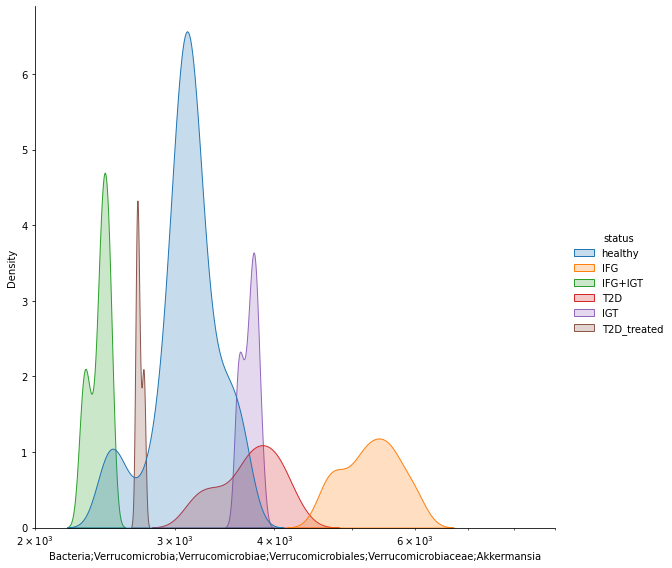

In [50]:
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,height=8, aspect=1)
a.set(xlim=(2000, 9000))

In [51]:
#name_1="Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia"
#import seaborn as sns
#a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
#a.set(xlim=(2000, 9000))

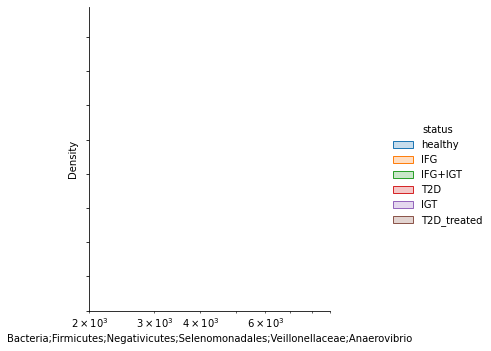

In [52]:
name_1="Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Anaerovibrio"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
a.set(yticklabels=[])

a.set(xlim=(2000, 9000))

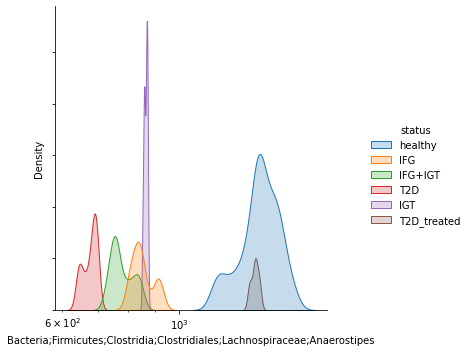

In [53]:
name_1="Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerostipes"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
a.set(yticklabels=[])

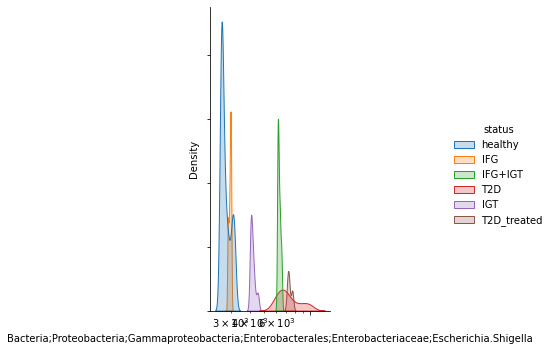

In [54]:
name_1="Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Escherichia.Shigella"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
a.set(xticklabels=[])
a.set(yticklabels=[])


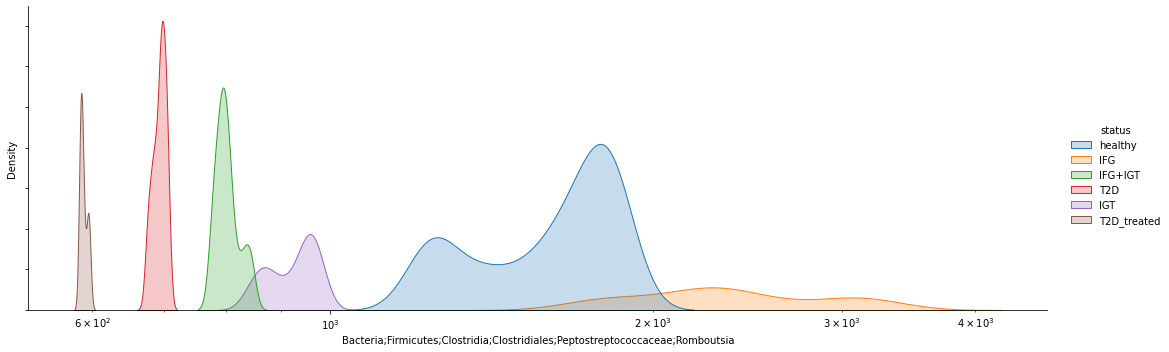

In [55]:
name_1= "Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Romboutsia"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

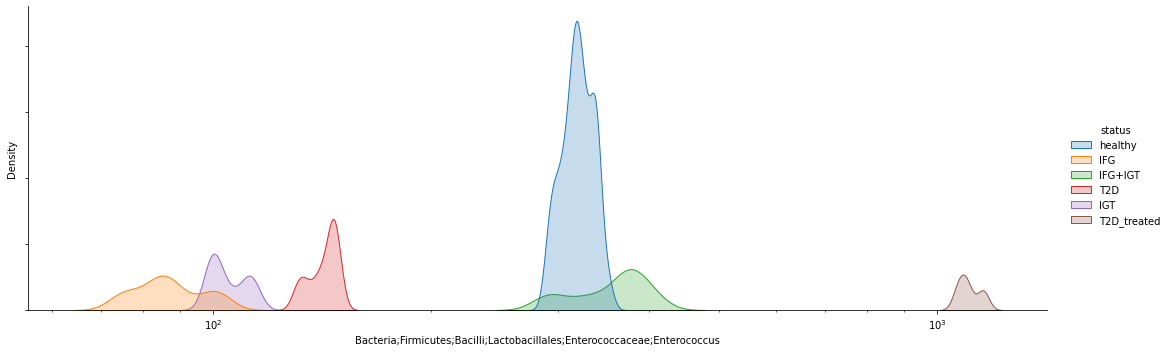

In [56]:
name_1= "Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Enterococcus"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

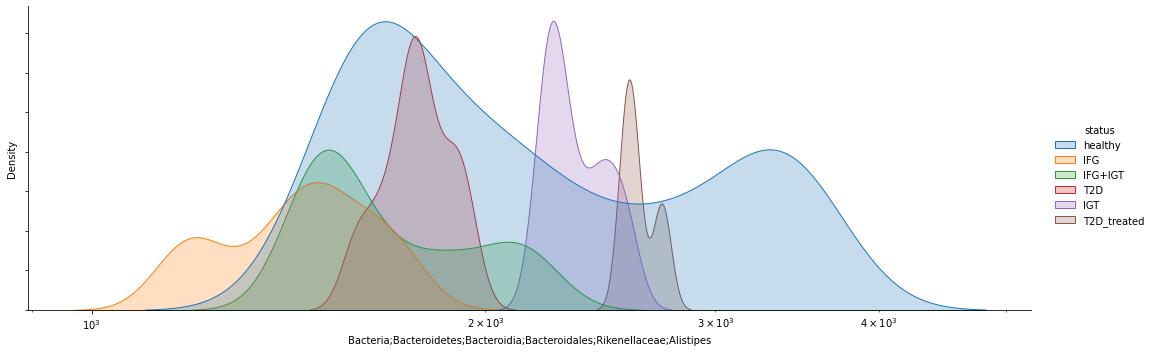

In [57]:
name_1 = "Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

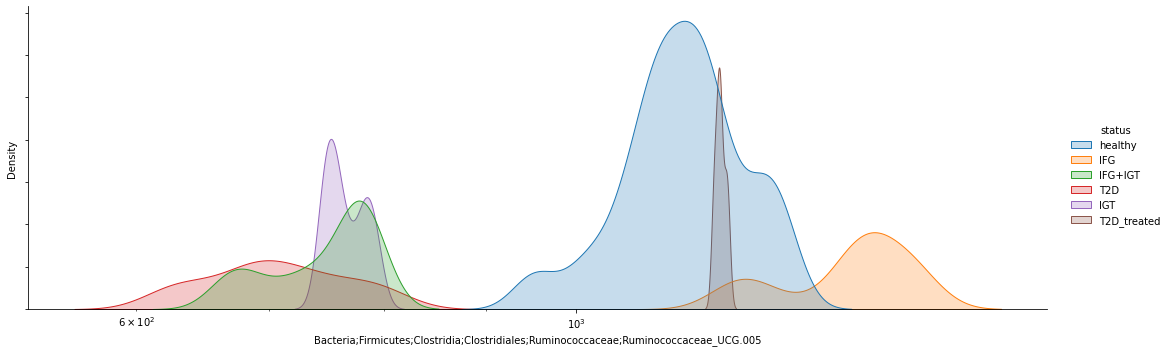

In [58]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae_UCG.005"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

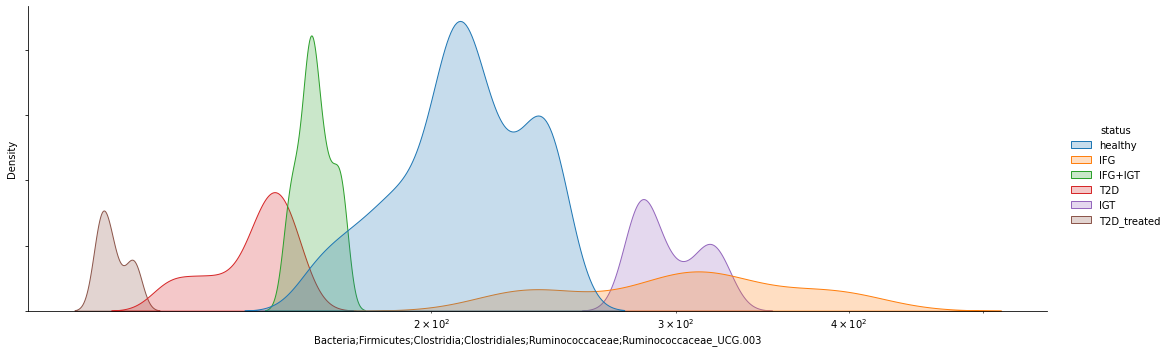

In [59]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae_UCG.003"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

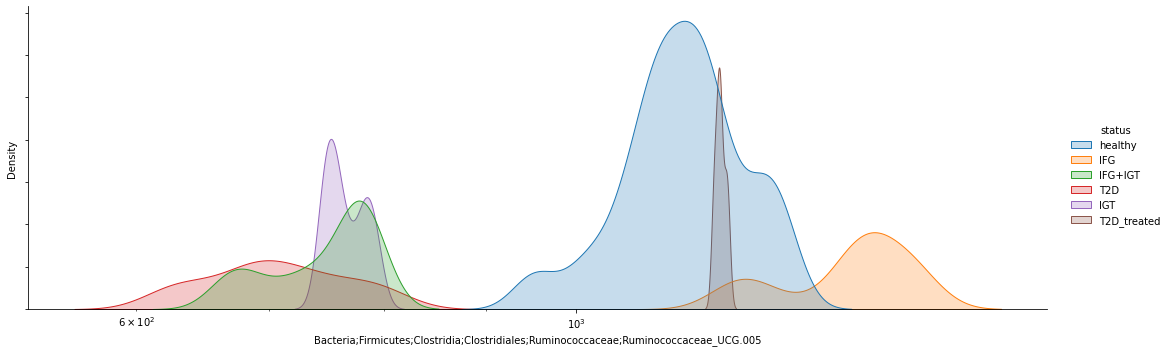

In [60]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae_UCG.005"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

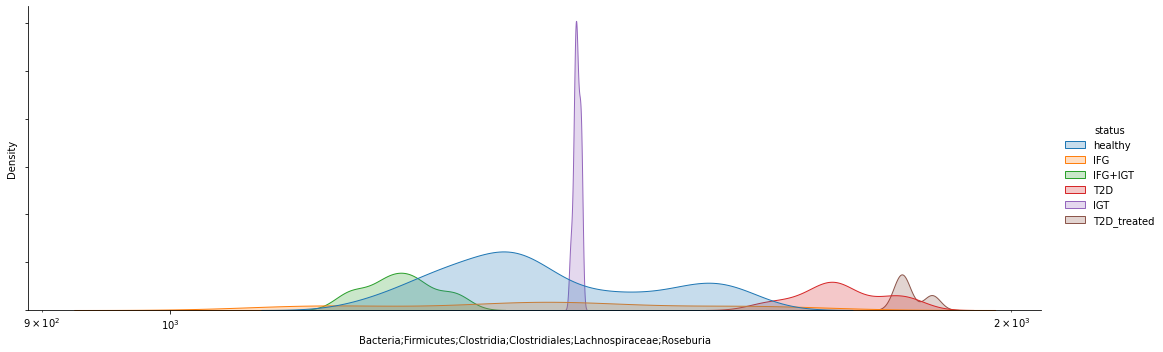

In [61]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Roseburia"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [62]:
!pip install scprep
import scprep
x=scprep.stats.differential_expression_by_cluster(dataframe_imp_super.iloc[:,:-1], sample_data_4umap, measure='emd', direction='both', gene_names=None, n_jobs=-2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
#clasesdic={"healthy":0,"IFG":1,"IGT":2,"IFG+IGT":3,"T2D":4,"T2D_treated":5}
emd = pd.DataFrame([       x[0]['emd'].rename('healthy'),      x[1]['emd'].rename('IFG'),
               x[2]['emd'].rename('IGT')  , x[3]['emd'].rename('IFG+IG') ,
                 x[4]['emd'].rename('T2D') ,  x[5]['emd'].rename('T2D_treated')])

In [64]:
c= pd.DataFrame()
#c['Akkermansia'] = emd['Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Akkermansia']

In [65]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL,percentile=80)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1203: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(**tight_params)


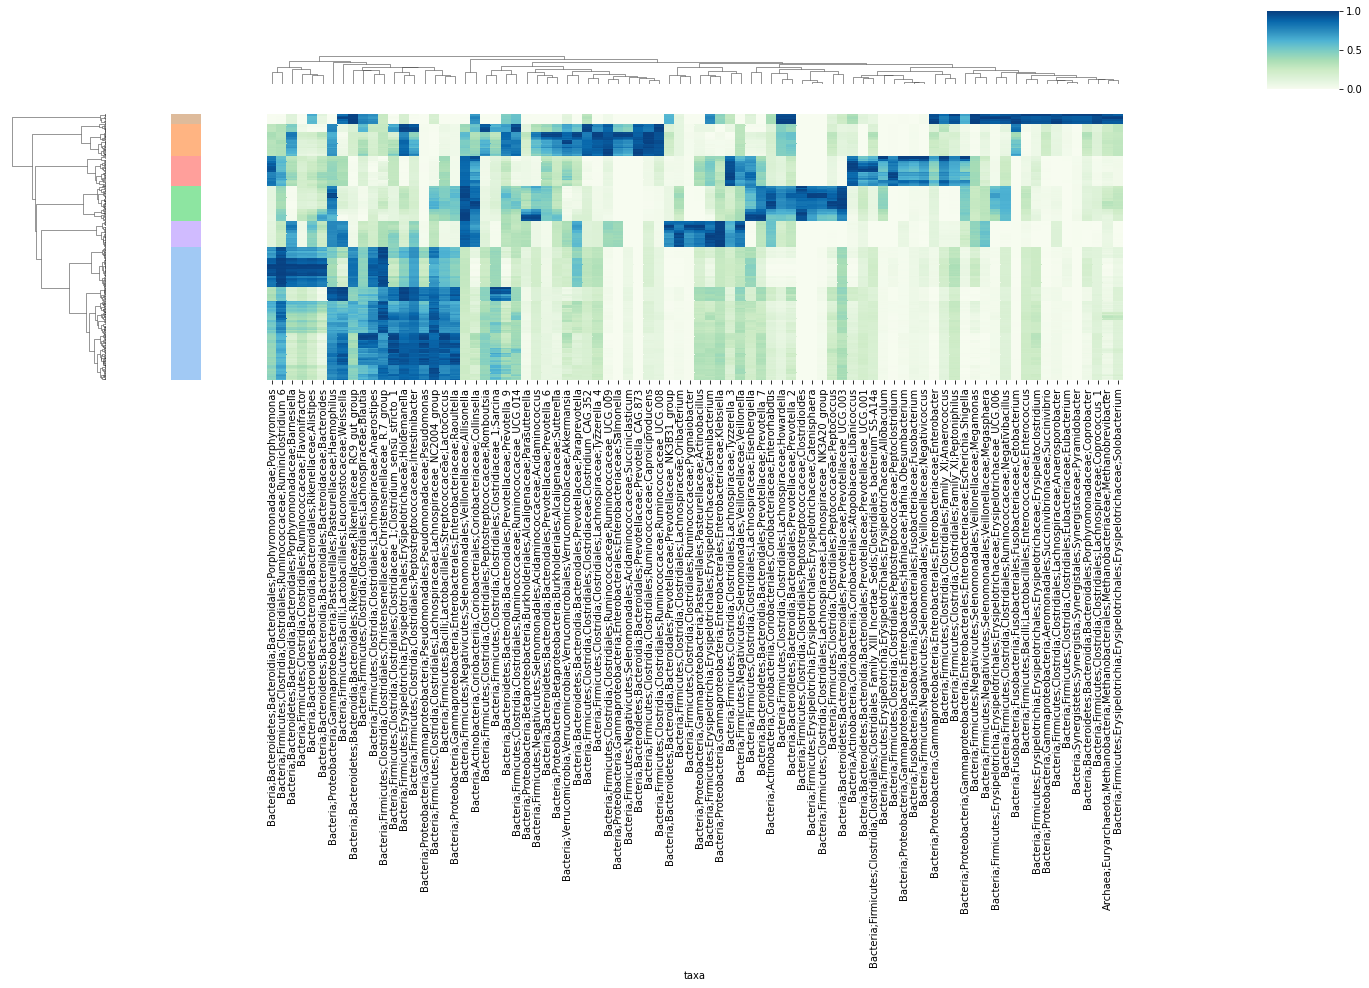

In [66]:
ax = sns.clustermap(imp_all.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(20, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

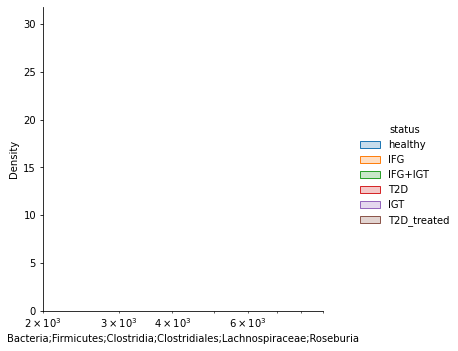

In [67]:
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True)
a.set(xlim=(2000, 9000))

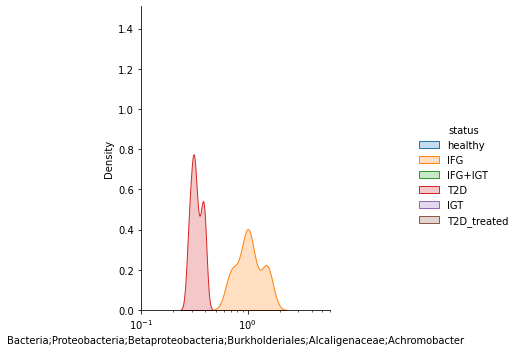

In [68]:
name_1 = 'Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter'

dataframe_imp_super.columns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True)
a.set(xlim=(0.1, 6))

**Install dependencies for Heatmap**

In [69]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL,percentile=80)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


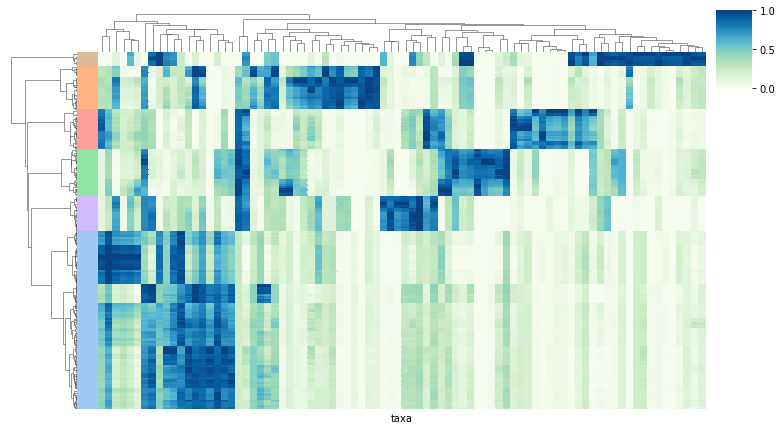

In [70]:
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [71]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


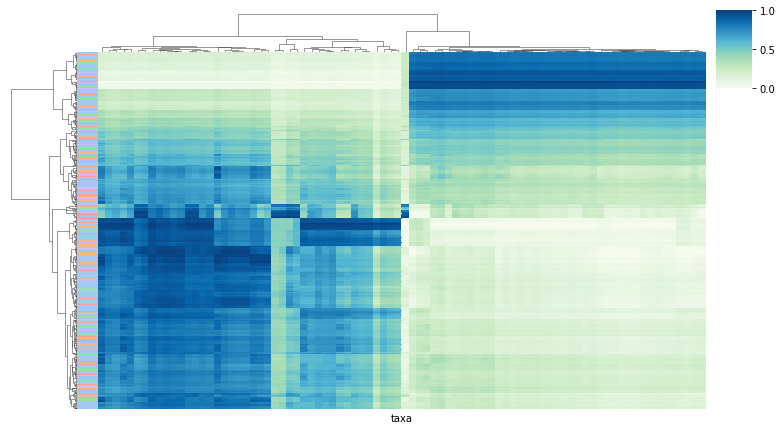

In [72]:
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


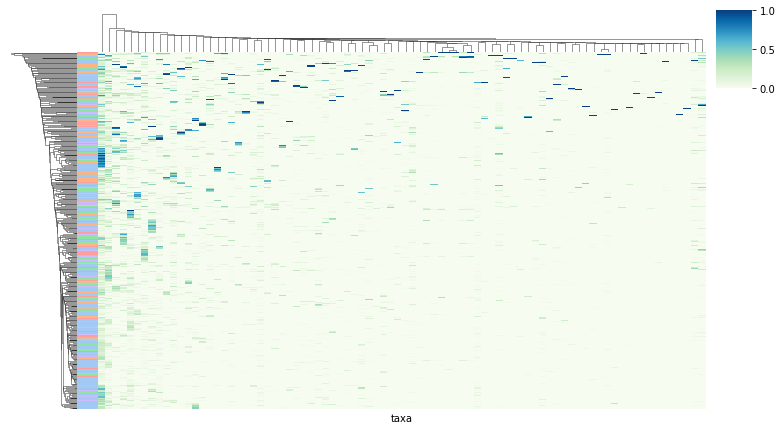

In [73]:
#z_score=1

imp_all = scprep.select.highly_variable_genes(complement_asvstable,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

##**Try Different target_ weight values**

In [74]:
target_weight= 0.9


umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=10000,min_dist=0.1,
                    n_neighbors=200,random_state=1,target_weight=target_weight)
data_umap_vis_super = umap_op.fit_transform(complement_asvstable,sample_data_4umap)

UMAP(angular_rp_forest=True, metric='cosine', n_components=10, n_epochs=10000, n_neighbors=200, random_state=1, target_weight=0.9, verbose=True)
Wed Nov 16 03:27:09 2022 Construct fuzzy simplicial set
Wed Nov 16 03:27:09 2022 Finding Nearest Neighbors
Wed Nov 16 03:27:10 2022 Finished Nearest Neighbor Search
Wed Nov 16 03:27:10 2022 Construct embedding


Epochs completed:   0%|            0/10000 [00:00]

Wed Nov 16 03:28:32 2022 Finished embedding


In [75]:
imputed_ALL_unsuper =mbPHENIX(complement_asvstable, data_umap_vis_super, t=5,decay=1,metric='euclidean',knn=10)

calculando distancias
(430, 430)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed Nov 16 03:28:33 2022


In [76]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


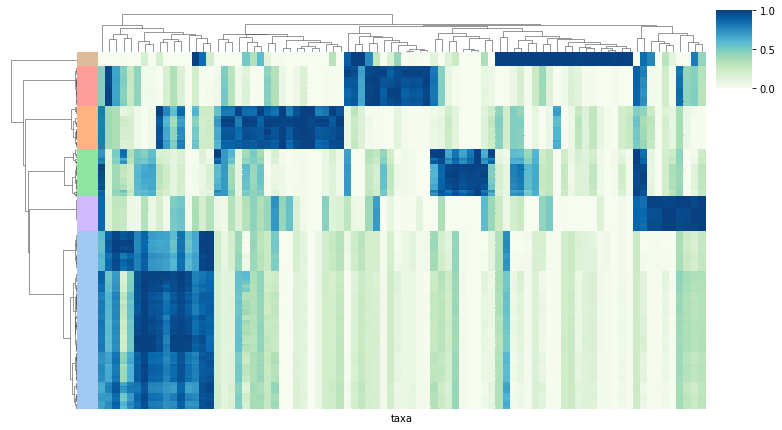

In [77]:
#z_score=1
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))